## Autoencoder Neural Network

In [ ]:
from keras.datasets import mnist, fashion_mnist
#from models import load_model
import numpy as np
import os
import argparse
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import math
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D

Using TensorFlow backend.


In [ ]:
# Read the dataset frof file 5
normal_classes_df = pd.read_csv('normal_classes_df.csv')
anomalous_classes_df = pd.read_csv('outliers_classes_df.csv')

In [ ]:
# Removing tag
x_train = normal_classes_df.drop(['Label'], axis=1)
x_abnormal = anomalous_classes_df.drop(['Label'], axis=1)

In [ ]:
print (x_train.shape, x_abnormal.shape)

(35183, 784) (1741, 784)


In [ ]:
# Saving Tags
y_train = normal_classes_df[['Label']].copy()
y_abnormal = anomalous_classes_df[['Label']].copy()

In [ ]:
#curdir = os.path.dirname(os.path.abspath(__file__))
parser = argparse.ArgumentParser()
parser.add_argument('--optimizer', choices=['adam','sgd','adagrad'], default='adam')
parser.add_argument('--loss', choices=['mean_squared_error', 'binary_crossentropy'], default='mean_squared_error')
parser.add_argument('--epochs', type=int, default=10)
parser.add_argument('--batch_size', type=int, default=64)
parser.add_argument('--test_samples', type=int, default=50)
#parser.add_argument('--result', default=os.path.join(curdir, 'result.png'))

_StoreAction(option_strings=['--test_samples'], dest='test_samples', nargs=None, const=None, default=50, type=<class 'int'>, choices=None, help=None, metavar=None)

In [ ]:
def deep_autoencoder():
    input_shape=(784,)
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(784, activation='sigmoid'))
    return model

In [ ]:
model = deep_autoencoder()

In [ ]:
x_train = x_train.values
x_abnormal = x_abnormal.values

In [ ]:
x_train = x_train.reshape(-1,28*28)
x_abnormal = x_abnormal.reshape(-1,28*28)

In [ ]:
# compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
%%time
# train on only normal training data
model.fit(x=x_train, y=x_train, epochs=10, batch_size=28)

Epoch 1/10
35183/35183 [==============================] - 4s 125us/step - loss: 0.0246
Epoch 2/10
35183/35183 [==============================] - 6s 173us/step - loss: 0.0095
Epoch 3/10
35183/35183 [==============================] - 7s 187us/step - loss: 0.0074
Epoch 4/10
35183/35183 [==============================] - 5s 145us/step - loss: 0.0064
Epoch 5/10
35183/35183 [==============================] - 7s 204us/step - loss: 0.0057
Epoch 6/10
35183/35183 [==============================] - 6s 158us/step - loss: 0.0053
Epoch 7/10
35183/35183 [==============================] - 5s 155us/step - loss: 0.0049
Epoch 8/10
35183/35183 [==============================] - 7s 185us/step - loss: 0.0046
Epoch 9/10
35183/35183 [==============================] - 6s 164us/step - loss: 0.0044
Epoch 10/10
35183/35183 [==============================] - 5s 151us/step - loss: 0.0042
Wall time: 58.4 s


In [ ]:
model

In [ ]:
abnormal = model.predict(x_abnormal)

In [ ]:
cm = np.array([[0, 0], [0, 0]])

In [ ]:
threshold = 0.03  # seting the threshold for Abnormal/Normal sampel

In [ ]:
# test Normal Dataset
losses = []
for x in x_train:
    # compule loss for each test sample
    x = np.expand_dims(x, axis=0)
    loss = model.test_on_batch(x, x)
    if loss > threshold:
        losses.append(loss)
    #losses.append(loss)

In [ ]:
TP = cm[1][1] = x_train.shape[0] - len(losses)
FN = cm[1][0] = len(losses)

In [ ]:
# test Abnormal Dataset
losses = []
fpr = dict()
for x in x_abnormal:
    # compule loss for each test sample
    x = np.expand_dims(x, axis=0)
    loss = model.test_on_batch(x, x)
    if loss > threshold:
        losses.append(loss)


In [ ]:
FP = cm[0][0] = (x_abnormal.shape[0]) - len(losses)
TN = cm[0][1] = len(losses)

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

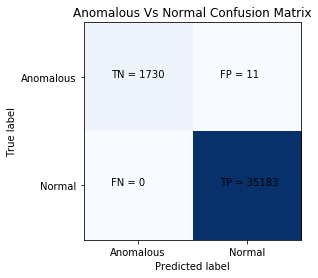

In [ ]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Anomalous','Normal']
plt.title('Anomalous Vs Normal Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j-0.25,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [ ]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Recall = TP/(TP+FN) # Sensitivity
Precision = TP/(TP+FP)
F1 = 2*(Precision*Recall/(Precision+Recall))

In [ ]:
print ("Accuracy   :", Accuracy)
print ("Recall     :", Recall)
print ("Precision  :", Precision)
print ("F1-score   :", F1)

Accuracy   : 0.9531470046582169
Recall     : 1.0
Precision  : 0.9531330425595319
F1-score   : 0.9760042166000887
